<h1>Hello World!</h1>

Starting the process of keeping update with Computer Vision Technology so this notebook will be keeping update as the time goes with new mini projects about the field.print

Mini Projects as said because if I start with a new project that isn't simple at all, I might better just do a diferent notebook for

<h1>Classic Image Processing Algorithms</h1>


<h3>RGB Channels and Histogram

(1080, 1920, 3)
(1080, 1920, 3)


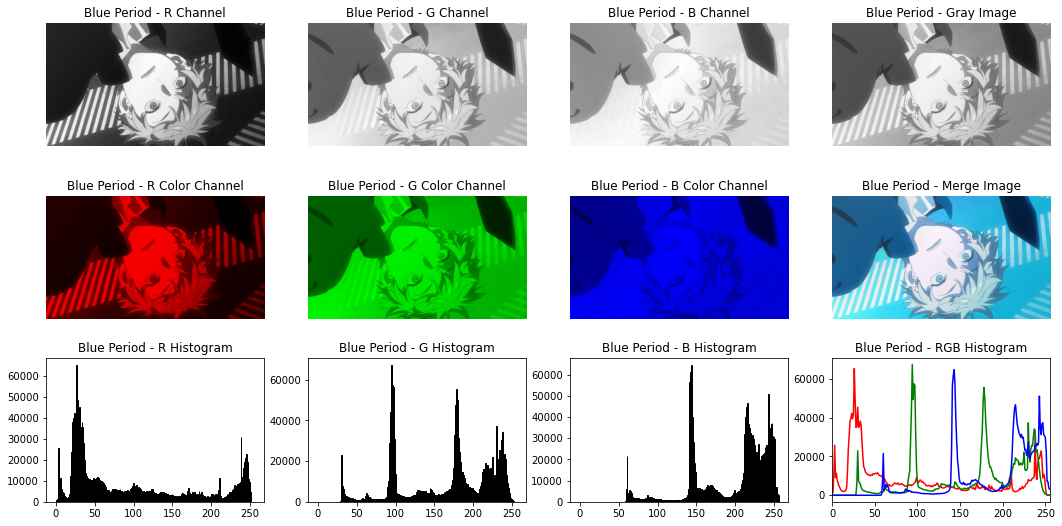

In [56]:
##### Images, Colors and Histograms #####

#Importing Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Read Image
img = cv.imread('blue-period.jpg', cv.IMREAD_COLOR)
# Note: OpenCV read images as BGR instead of RGB so we need to convert.

#Get each BGR part of Image
b_gimg, g_gimg, r_gimg = cv.split(img)

#Other Method to split channels
#b_img = img[:,:, 0]
#g_img = img[:,:, 1]
#r_img = img[:,:, 2]

# Converting Image
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#Convert to Gray Scale
gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

#Merge Image again
merge_img = cv.merge((r_gimg, g_gimg, b_gimg))

#Shows Image Shape
print (img.shape)

# Copy the image
r_img = img.copy()
g_img = img.copy()
b_img = img.copy()

# Another way to get a variable with same shape of the image
copyimg = np.zeros(shape=img.shape, dtype=np.uint8)
print (copyimg.shape)

# Set green and blue channels to 0
r_img[:,:,1] = 0
r_img[:,:,2] = 0

# Set red and blue channels to 0
g_img[:,:,0] = 0
g_img[:,:,2] = 0

# Set green and red channels to 0
b_img[:,:,0] = 0
b_img[:,:,1] = 0

# Another way to get histograms of image
#r_hist = cv.calcHist([r_gimg],[0], None, [256], [0,256])
#g_hist = cv.calcHist([g_gimg],[0], None, [256], [0,256])
#b_hist = cv.calcHist([b_gimg],[0], None, [256], [0,256])

#plt.plot(r_hist)
#plt.plot(g_hist)
#plt.plot(b_hist)

#Plot Channels Images
plt.subplot(3, 4, 1)
plt.imshow(r_gimg, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title('Blue Period - R Channel')
plt.subplot(3, 4, 2)
plt.imshow(g_gimg, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title('Blue Period - G Channel')
plt.subplot(3, 4, 3)
plt.imshow(b_gimg, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title('Blue Period - B Channel')
plt.subplot(3, 4, 4)
plt.imshow(gray_img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title('Blue Period - Gray Image')

#Print Colored Channel Images
plt.subplot(3, 4, 5)
plt.imshow(r_img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title('Blue Period - R Color Channel')
plt.subplot(3, 4, 6)
plt.imshow(g_img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title('Blue Period - G Color Channel')
plt.subplot(3, 4, 7)
plt.imshow(b_img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title('Blue Period - B Color Channel')
plt.subplot(3, 4, 8)
plt.imshow(merge_img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title('Blue Period - Merge Image')

# Histograms of the Image
plt.subplot(3, 4, 9)
plt.hist(r_gimg.ravel(), bins=256, range=(0, 256), fc='k', ec='k')
plt.title('Blue Period - R Histogram')

plt.subplot(3, 4, 10)
plt.hist(g_gimg.ravel(), bins=256, range=(0, 256), fc='k', ec='k')
plt.title('Blue Period - G Histogram')

plt.subplot(3, 4, 11)
plt.hist(b_gimg.ravel(), bins=256, range=(0, 256), fc='k', ec='k')
plt.title('Blue Period - B Histogram')

color = ('r', 'g', 'b')
for i, col in enumerate(color):
    img_hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.subplot(3, 4, 12)
    plt.title('Blue Period - RGB Histogram')
    plt.plot(img_hist, color = col)
    plt.xlim([0, 256])

plt.rcParams["figure.figsize"] = (18, 9)
plt.show()


<h3>Scaling and Brightness

Image Shape:  (1343, 1918, 3)
Image Shape Resized:  (553, 367, 3)
Image DownScaled Shape:  (335, 479, 3)
Image UpScaled Shape:  (2014, 2877, 3)


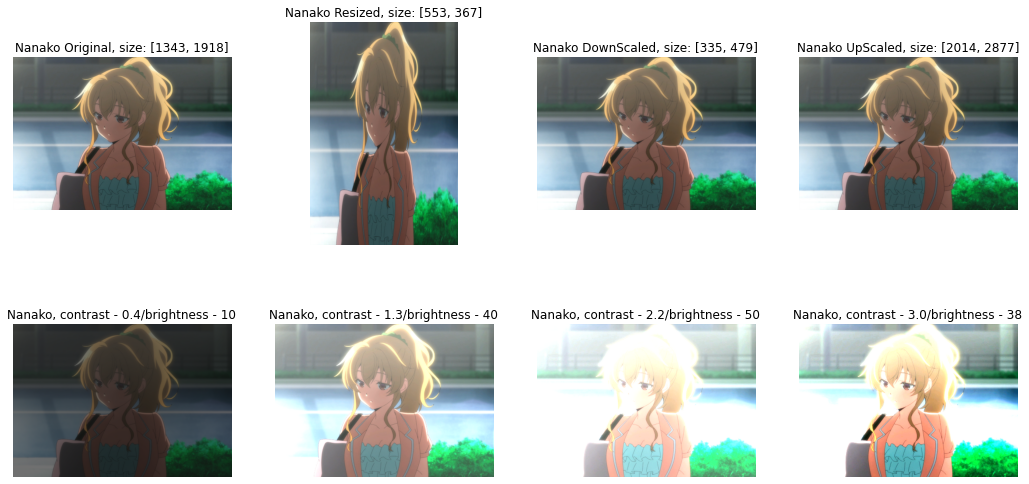

In [76]:
### Resize, Scaling, Brightness and Contrast ###

# Importing Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load Image and convert to RGB
img = cv.imread('n@n@.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

### RESIZE ###

# Original Image Shape
print("Image Shape: ", img.shape)

# Defining Custom Size
height = 553
width = 367
dimension = (width, height)

# OpenCV Resize function
resized = cv.resize(img, dimension, interpolation = cv.INTER_AREA)

# Image Shape
print("Image Shape Resized: ", resized.shape)

### SCALING ###

# Obtained Image Size Features
height, width, ch = img.shape[:]

# DownScaling these features
downscale_factor = 25
height = int(img.shape[0] * downscale_factor/100)
width = int(img.shape[1] * downscale_factor/100)
dimension = (width, height)

downimg = cv.resize(img, dimension, interpolation = cv.INTER_AREA)

# Image Shape
print("Image DownScaled Shape: ", downimg.shape)

# UpScaling these features
upscale_factor = 150
height = int(img.shape[0] * upscale_factor/100)
width = int(img.shape[1] * upscale_factor/100)
dimension = (width, height)

upimg = cv.resize(img, dimension, interpolation = cv.INTER_AREA)

# Image Shape
print("Image UpScaled Shape: ", upimg.shape)

### BRIGHTNESS AND CONTRAST ###

alpha = 1.0     #Simple Contrast Control
beta = 0        #Simple Brightness Control

# Auxiliar Function to Change Contrast and Brightness of Image 
def brightness(img, alpha, beta):

    # Auxiliar Image
    NewImg = np.zeros(img.shape, img.dtype)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            for c in range(img.shape[2]):
                NewImg[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)

    return NewImg

# Plot Resized Images
plt.subplot(2, 4, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Nanako Original, size: [1343, 1918]')
plt.subplot(2, 4, 2)
plt.imshow(resized)
plt.axis('off')
plt.title('Nanako Resized, size: [553, 367]')
plt.subplot(2, 4, 3)
plt.imshow(downimg)
plt.axis('off')
plt.title('Nanako DownScaled, size: [335, 479]')
plt.subplot(2, 4, 4)
plt.imshow(upimg)
plt.axis('off')
plt.title('Nanako UpScaled, size: [2014, 2877]')

# Plot Images with different contrast and brightness
plt.subplot(2, 4, 5)
plt.imshow(brightness(downimg, 0.4, 10))
plt.axis('off')
plt.title('Nanako, contrast - 0.4/brightness - 10')
plt.subplot(2, 4, 6)
plt.imshow(brightness(downimg, 1.3, 40))
plt.axis('off')
plt.title('Nanako, contrast - 1.3/brightness - 40')
plt.subplot(2, 4, 7)
plt.imshow(brightness(downimg, 2.2, 50))
plt.axis('off')
plt.title('Nanako, contrast - 2.2/brightness - 50')
plt.subplot(2, 4, 8)
plt.imshow(brightness(downimg, 3.0, -60))
plt.axis('off')
plt.title('Nanako, contrast - 3.0/brightness - -60')

plt.rcParams["figure.figsize"] = (18, 9)
plt.show()

<h3>Morphological Operations

In [58]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


### DILATION AND EROSION ###

### OPENING AND CLOSING ###

### TOP-HAT

### GRADIENT

### EXTREMUM



<h3>Gaussian Image Processing

Text(0.5, 1.0, 'Marin')

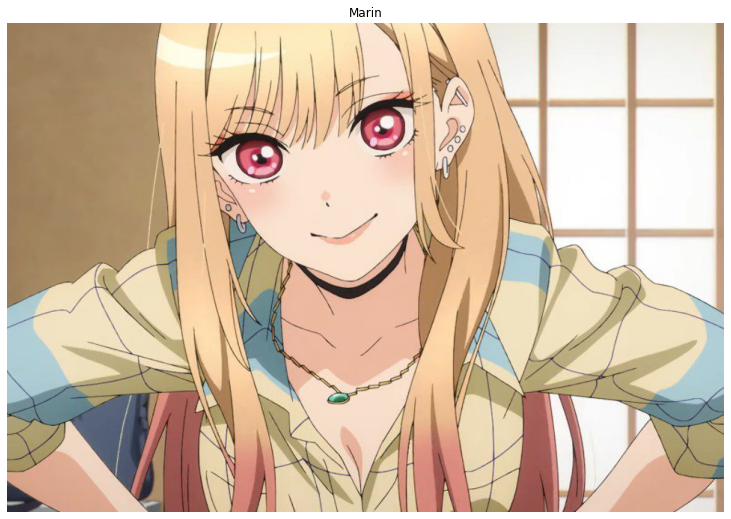

In [82]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('marin.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)



plt.imshow(img)
plt.axis('off')
plt.title('Marin')

<h3> Masks

(1080, 1920, 3)


Text(0.5, 1.0, 'Maha w/ background blurred')

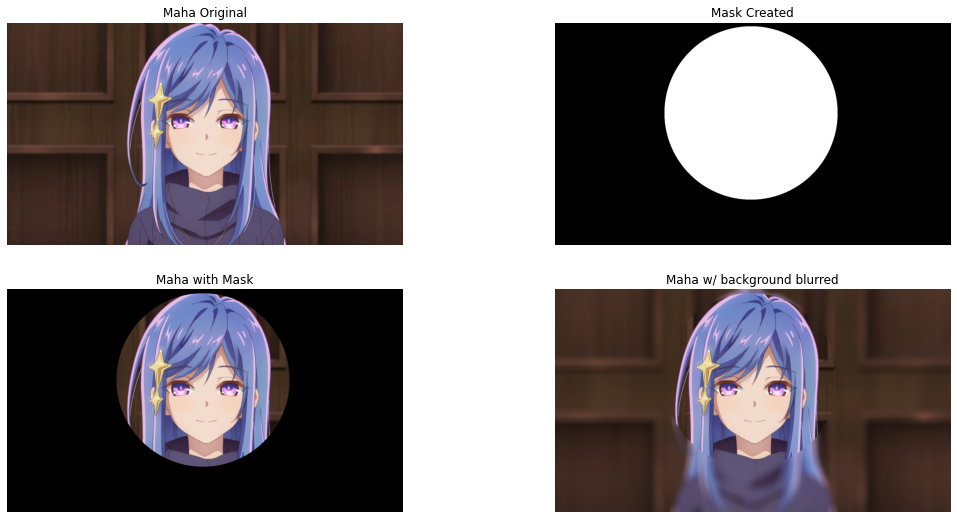

In [106]:
#### MASKS ####

# Import Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Import Image
img = cv.imread('maha.png', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Create Mask
mask = np.zeros(img.shape, img.dtype)

# Create Circle in mask
center = (950, 440)
radius = 420
color = (255, 255, 255)
cv.circle(mask, center, radius, color, -1)
masked_img = cv.bitwise_and(img, mask)

# Create Blur Mask 
blur = cv.blur(img,(45,45),0)
blurmasked_img = np.add(cv.bitwise_or(blur, mask), cv.bitwise_and(img, mask))

# Result Plots
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Maha Original')
plt.subplot(2, 2, 2)
plt.imshow(mask)
plt.axis('off')
plt.title('Mask Created')
plt.subplot(2, 2, 3)
plt.imshow(masked_img)
plt.axis('off')
plt.title('Maha with Mask')
plt.subplot(2, 2, 4)
plt.imshow(blurmasked_img)
plt.axis('off')
plt.title('Maha w/ background blurred')



<h3> Color Balancing

In [61]:

### COLOR BALANCING ###


<h3>Edge Detection

Text(0.5, 1.0, 'Anime Boy')

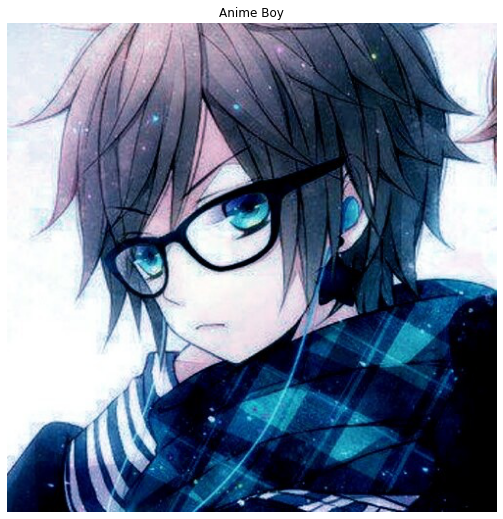

In [62]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('anime-pic.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)



plt.imshow(img)
plt.axis('off')
plt.title('Anime Boy')

<h3> Filter Vignette


Text(0.5, 1.0, 'Rudeus')

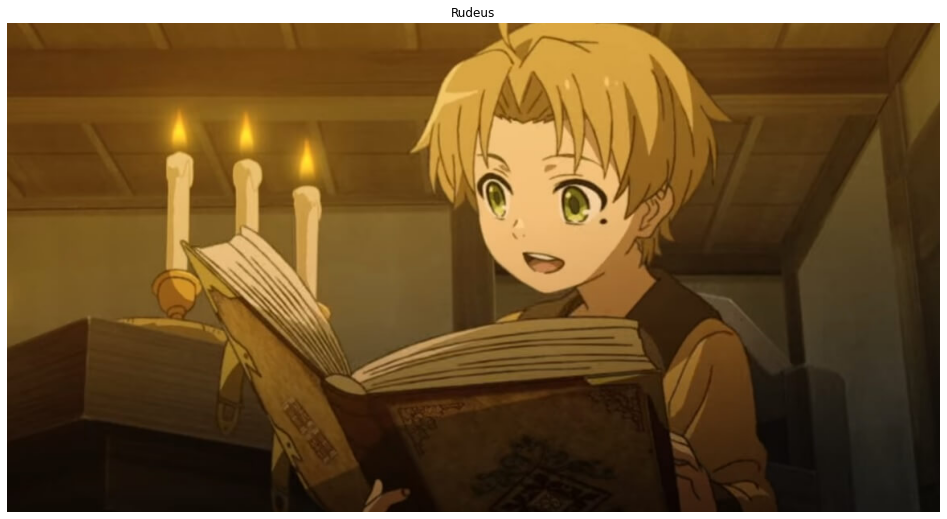

In [63]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('rudeus.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)



plt.imshow(img)
plt.axis('off')
plt.title('Rudeus')

<h3>Face Detection with Haar's

Text(0.5, 1.0, 'Tokyo Revengers')

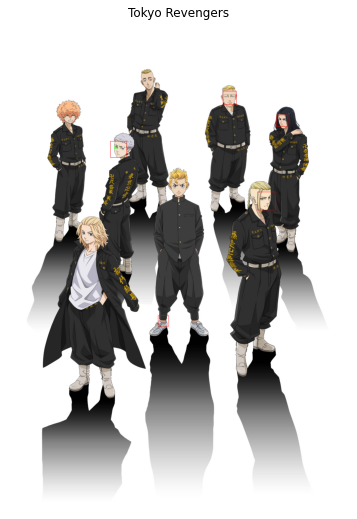

In [64]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')


img = cv.imread('tokyo-revengers.jpg', cv.IMREAD_COLOR)
gimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

faces = face_cascade.detectMultiScale(gimg, 1.3, 2)

for (x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gimg[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img)
plt.axis('off')
plt.title('Tokyo Revengers')
